In [1]:
#Installing relevent packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import glob
from primaite import PRIMAITE_PATHS
from pathlib import Path


# Define helper functions
 Function to convert a list of csvs into a dataframe
 
 Function to find relevant csvs and plot them

In [42]:
def dataframe_constructor(csv_list, df_list, model):
    # Base case, if csv_list is empty then concatenate dataframes
    if len(csv_list) == 0:
        final_df = pd.concat(df_list, axis=1)
        final_df.index.name='Episode'
        final_df.index += 1
        return final_df
    # Recursive case, if csv_list is not empty then we have more csvs to convert to dataframes
    else:
       csv_to_to_append = csv_list.pop()
       df_to_append = pd.read_csv(csv_to_to_append, usecols=['Average Reward'])
       new_col_name = model + '_' + csv_to_to_append.name[27:-4]
       df_to_append.rename(columns={'Average Reward': new_col_name}, inplace=True)
       df_list.append(df_to_append)
       return dataframe_constructor(csv_list, df_list, model)
    
#We need to extract the files and store them
def generate_plot(subfolders_to_search,window,name, repo_folder = None):
    model_df_dict = {}
        
    # Find csvs and convert to dataframes
    if repo_folder is not None:
        model = repo_folder
        #repo_reward_folder_path = Path(f'..\\previous_sessions\\{repo_folder}\\average_rewards')
        repo_reward_folder_path = Path(f'..\\..\\previous_sessions\\{model}\\average_rewards')
        model_ave_reward_files = [filename for filename in repo_reward_folder_path.glob('average*')]
        model_df = dataframe_constructor(model_ave_reward_files, [], model)
        model_df_dict[f'{model}'] = model_df.rolling(window=window, center=False).mean()
    else:
        for model in subfolders_to_search:
            model_ave_reward_files = []
            for time_stamp in subfolders_to_search[model]:
                time_stamp_files_path = Path.joinpath(PRIMAITE_PATHS.user_sessions_path.parent,'Hyperparameters',model,time_stamp)
                model_time_stamp_ave_reward_files = [filename for filename in time_stamp_files_path.glob('average*')]
                model_ave_reward_files += model_time_stamp_ave_reward_files
            model_df = dataframe_constructor(model_ave_reward_files, [], model)
            model_df_dict[f'{model}'] = model_df.rolling(window=window, center=False).mean()

        
            all_models_df = pd.concat(list(model_df_dict.values()), axis=1)

    if repo_folder is not None:
        title = name
        columns = model_df_dict[model].columns.to_list()
        model_df_dict[model] = model_df_dict[model].rename(columns={col:col[len(model)+1:] for col in columns})
    else:
        if len(subfolders_to_search)==1:
            if name is None:
                title = model
            else:
                title = name
            columns = model_df_dict[model].columns.to_list()
            model_df_dict[model] = model_df_dict[model].rename(columns={col:col[len(model)+1:] for col in columns})
        else:
            title = None

    lineStyle = ['-','--',':','.-']
    ax = None
    cmap = plt.get_cmap()
    for iM, model in enumerate(model_df_dict.keys()):
        ax = model_df_dict[model].plot(ax=ax,
                lw=1, 
                figsize=(15,7),
                linestyle = lineStyle[iM],
                grid=True,
                cmap = cmap)
    ax.legend(loc='upper left')
    plt.xlabel('Episode', fontsize=16)
    plt.ylabel(f'Average Step Reward ({window} Episodes)', fontsize=15)
    plt.title(title, fontsize=17)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(2,4))
    plt.savefig(f'{name}.png', bbox_inches='tight')
    plt.show()


## Baseline NN case


### 2 x 64 Neural Network

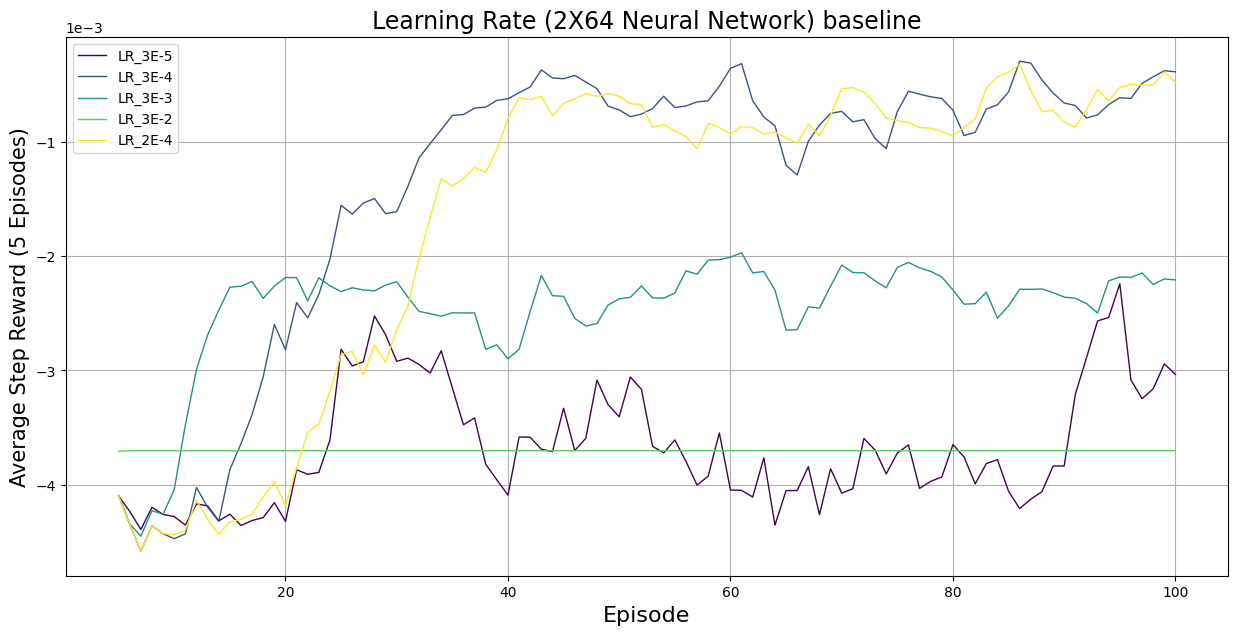

In [53]:
repo_folder_to_plot = 'Baseline_2X64_NN_LR_100_episodes'
name = 'Learning Rate (2X64 Neural Network) baseline'
window = 5
generate_plot({},window,name, repo_folder=repo_folder_to_plot)

## Complex NN case

### 2 x 64 Neural Network

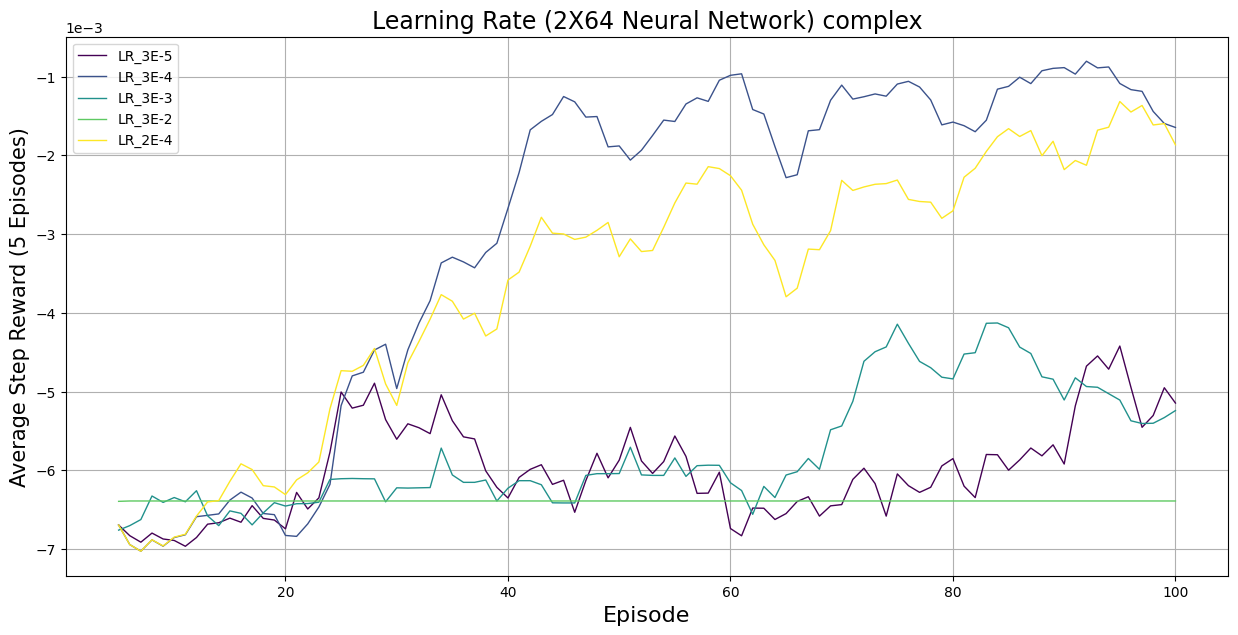

In [52]:
repo_folder_to_plot = 'Complex_2X64_NN_LR_100_episodes'
name = 'Learning Rate (2X64 Neural Network) complex'
window = 5
generate_plot({},window,name, repo_folder=repo_folder_to_plot)